# SVM, Random Forest (Compare on the same dataset using various performance matrices like acc, recall. Before that, show the distribution of data)

In [16]:
import pandas as pd
data = pd.read_csv('breast_cancer_data.csv')
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]
x.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0        17.99         10.38          122.80     1001.0          0.11840
1        20.57         17.77          132.90     1326.0          0.08474
2        19.69         21.25          130.00     1203.0          0.10960
3        11.42         20.38           77.58      386.1          0.14250
4        20.29         14.34          135.10     1297.0          0.10030

In [17]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosis, dtype: int64

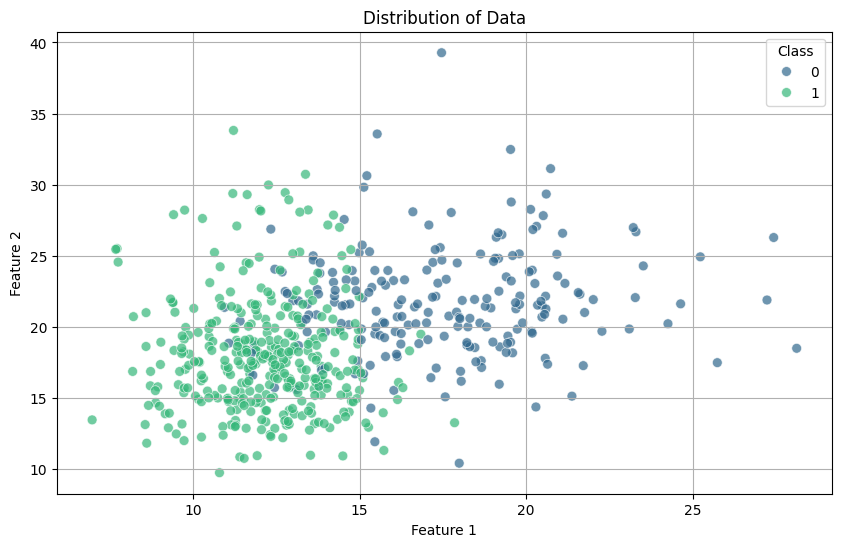

In [18]:
# Visualizing Data Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=x.iloc[:,0], y=x.iloc[:,1], hue=y, palette='viridis', s=50, alpha=0.7)
plt.title('Distribution of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

In [19]:
# splitting data
from sklearn.model_selection import train_test_split

trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.2)

trainx.head()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
470        9.667         18.49           61.49      289.1          0.08946
116        8.950         15.76           58.74      245.2          0.09462
362       12.760         18.84           81.87      496.6          0.09676
390       10.260         12.22           65.75      321.6          0.09996
231       11.320         27.08           71.76      395.7          0.06883

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(trainx)
X_test_scaled = scaler.transform(testx)

In [21]:
print(f"Training set size: {trainx.shape} samples")
print(f"Testing set size: {testx.shape[0]} samples")

Training set size: (455, 5) samples
Testing set size: 114 samples


In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_model_rbf = SVC(kernel='rbf')
svm_model_rbf.fit(X_train_scaled, trainy)
y_pred_svm_rbf = svm_model_rbf.predict(X_test_scaled)
acc_score_svm_rbf = accuracy_score(testy, y_pred_svm_rbf)
acc_score_svm_rbf

# kernels = ["linear", "poly", "rbf", "sigmoid"]

# acc_result_svm = []

# for kernel in kernels:
#     svm_model = SVC(kernel=kernel)
#     svm_model.fit(X_train_scaled, trainy)
#     y_pred_svm = svm_model.predict(X_test_scaled)
#     acc_score_svm = accuracy_score(testy, y_pred_svm)
#     acc_result_svm.append(acc_score_svm)
# acc_result_svm

0.9385964912280702

In [23]:
# plt.stem(kernels, acc_result_svm)
# plt.xlabel("kernels")
# plt.ylabel("accuracy")
# plt.grid(True)

In [24]:
from sklearn.ensemble import RandomForestClassifier

rfc_model_100 = RandomForestClassifier(n_estimators=100)
rfc_model_100.fit(X_train_scaled, trainy)
y_pred_rfc_100 = rfc_model_100.predict(X_test_scaled)
acc_score_rfc_100 = accuracy_score(testy, y_pred_rfc_100)
acc_score_rfc_100


# acc_res_rfc = []

# for ne in [50, 100, 150]:
#     rfc_model = RandomForestClassifier(n_estimators=ne)
#     rfc_model.fit(trainx, trainy)
#     y_pred_rfc = rfc_model.predict(testx)
#     acc_score_rfc = accuracy_score(testy, y_pred_rfc)
#     acc_res_rfc.append(acc_score_rfc)

# acc_res_rfc

0.9210526315789473

In [25]:

# Compare Model Performance 

from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Performance metrics for SVM
print("\n--- SVM Performance ---")
accuracy_svm = accuracy_score(testy, y_pred_svm_rbf)
precision_svm = precision_score(testy, y_pred_svm_rbf)
recall_svm = recall_score(testy, y_pred_svm_rbf)
f1_svm = f1_score(testy, y_pred_svm_rbf)

print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")
print("\nClassification Report:")
print(classification_report(testy, y_pred_svm_rbf))


# Performance metrics for Random Forest
print("\n--- Random Forest Performance ---")
accuracy_rf = accuracy_score(testy, y_pred_rfc_100)
precision_rf = precision_score(testy, y_pred_rfc_100)
recall_rf = recall_score(testy, y_pred_rfc_100)
f1_rf = f1_score(testy, y_pred_rfc_100)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print("\nClassification Report:")
print(classification_report(testy, y_pred_rfc_100))



--- SVM Performance ---
Accuracy: 0.9386
Precision: 0.9200
Recall: 0.9857
F1-Score: 0.9517

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.92        44
           1       0.92      0.99      0.95        70

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114


--- Random Forest Performance ---
Accuracy: 0.9211
Precision: 0.8961
Recall: 0.9857
F1-Score: 0.9388

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        44
           1       0.90      0.99      0.94        70

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114




--- Feature Importance (from Random Forest) ---


/tmp/ipykernel_41084/1451026281.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette='viridis')


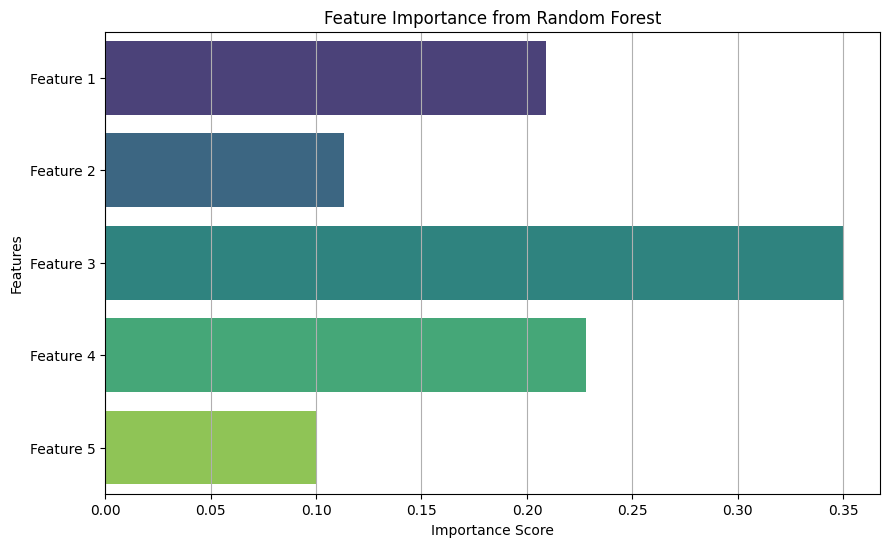

In [26]:
# Feature Importance (from Random Forest)
print("\n--- Feature Importance (from Random Forest) ---")

importances = rfc_model_100.feature_importances_
feature_names = [f'Feature {i+1}' for i in range(x.shape[1])]

# Create a bar plot for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.grid(True, axis='x')
plt.show()